# PREDICTING DIABETES WITH MACHINE LEARNING

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
#loading data
data=pd.read_csv('diabetes 3.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# DATA CLEANING

In [70]:
#checking for null values 
data.isnull().sum()  #there are no null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
#it will be a serious medical problem if a person have an insulin level and skin thickness of 0. this could therefore 
#attribute to the fact that those records were not taking (missing values)
print((data[:]==0).sum())  #columns with 0 entries

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [4]:
#looking at percentage of 0 entries
print(((data[:]==0).sum())/768*100)

#48% of the patients did not have their insulin measured. maybe the doctors measured insulin levels of unhealthy looking 
#patients or maybe they only measured insulin levels after having first made a preliminary diagnose.
#if this is true, this might be a form of data leakage and this will lead to overfitting
#in order to check this hypothesis, i will check whether or not the insulin and skin thickness features are corrrelated with
#the diagnostic outcome and and such will rule out our concern on data leakage

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64


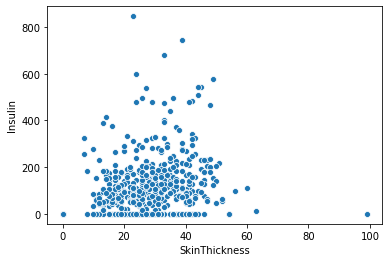

In [6]:
sns.scatterplot(data['SkinThickness'],data['Insulin'])
#these features are not highly correlated with any given outcome and we can rule out the concern of data leakage.
#the 0 values in these categories are still erroneous, however and therefore should not be included in our model
#we will replace these values with distributions near the median.

# EXPLORATORY DATA ANALYSIS

In [7]:
#shape of the data. number of rows and columns 
data.shape

(768, 9)

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#checking for null values 
data.isnull().sum()   #wow, there are no null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
##looking at the datatypes 
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#staististical inference from the data 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# DATA VISUALIZATION 

<Figure size 576x576 with 0 Axes>

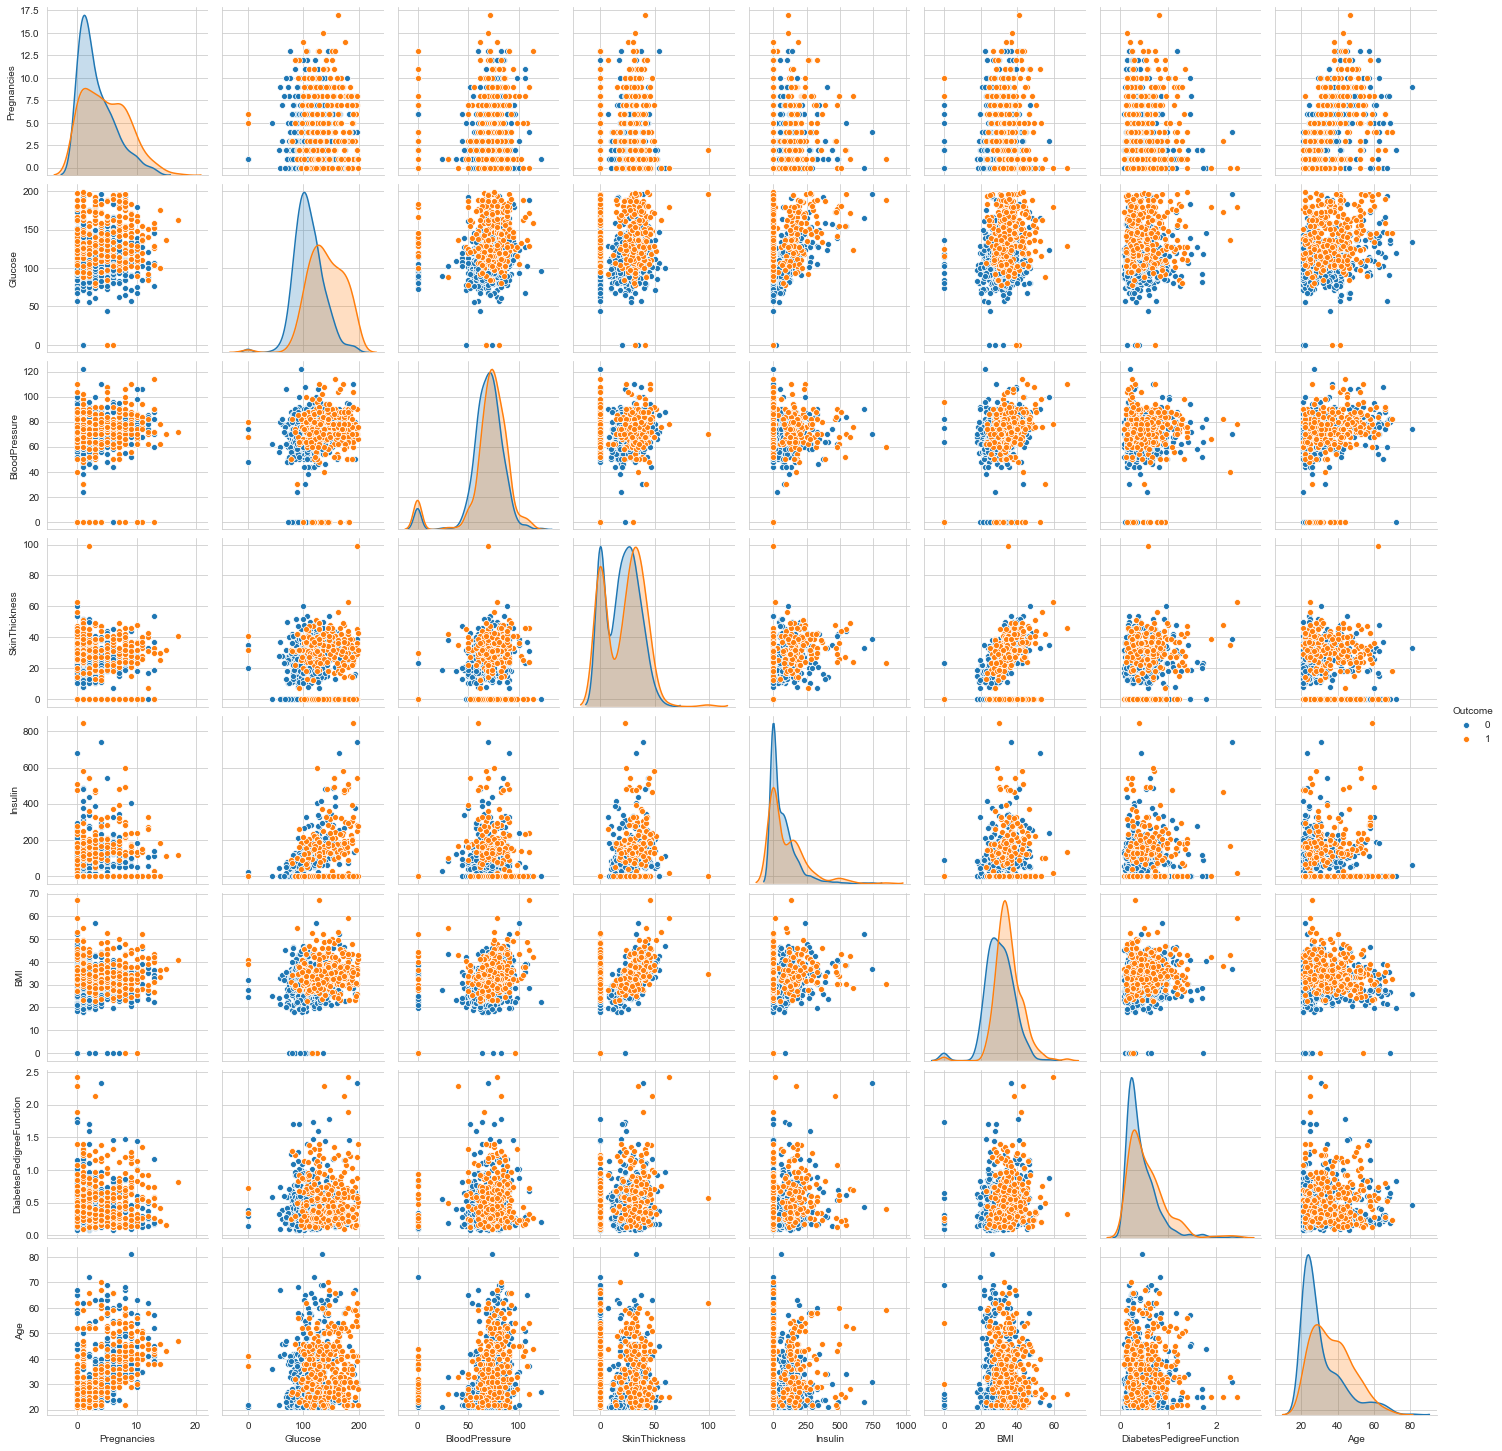

In [13]:
#pairplot for the data to check the relationship between the variables
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.pairplot(data,hue='Outcome')
plt.show()

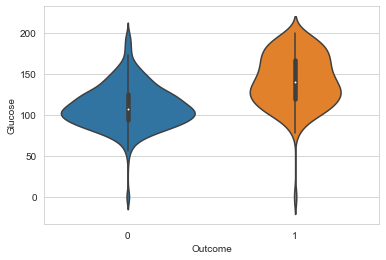

In [14]:
#plotting a violin 
sns.set_style('whitegrid')
sns.violinplot(data['Outcome'],data['Glucose'])
plt.show()

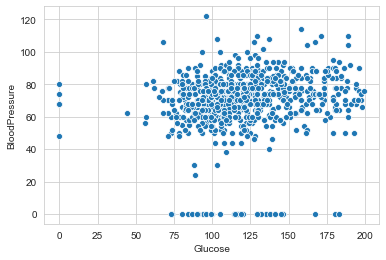

In [15]:
#relationship between glucose and blood pressure
sns.scatterplot(data['Glucose'],data['BloodPressure'])
plt.show()

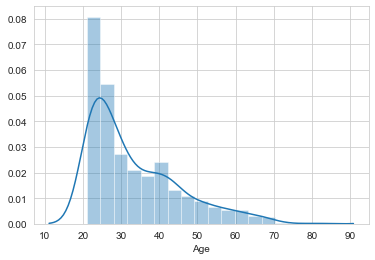

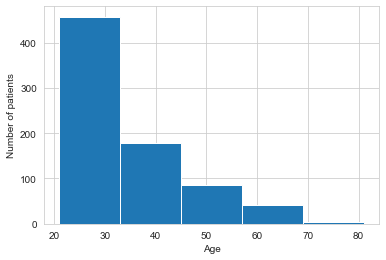

In [16]:
#age distribution
sns.distplot(data['Age'])
plt.show()
##minimum age been 21 and oldest being 81. rhe age distribution is rightly skewed. most of the patients are between the ages
#of 21 and 30. 
plt.hist(data['Age'],bins=5)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()

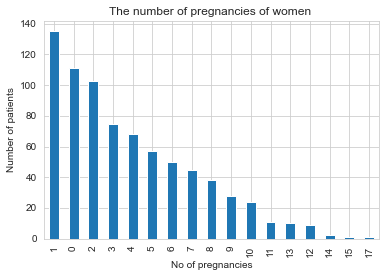

In [17]:
#number of pregnancies for each of the patients
plt.title('The number of pregnancies of women ')
data['Pregnancies'].value_counts().plot.bar()
plt.xlabel('No of pregnancies')
plt.ylabel('Number of patients')
plt.show()
plt.show()

#most of the patients have been pregnant once followed by those who have not been pregnant  and follows in that order. 
#one person have been pregnant on 17 occasins

No handles with labels found to put in legend.


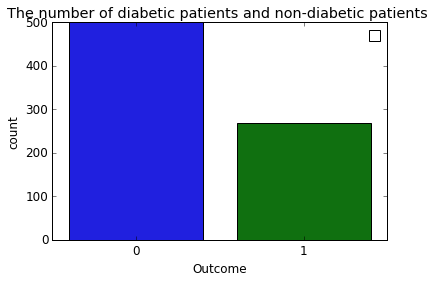

In [18]:
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
plt.style.use('classic')
plt.title('The number of diabetic patients and non-diabetic patients ')
plt.legend()
sns.countplot(data['Outcome'])
plt.show()

#most of the patients are not diabetic poatients. 500 of them are not while 250 are

# MACHINE LEARNING (PREDICTIVE MODELLING) 

In [46]:
#extracting the target variable 
y=data.iloc[:,8]
#extracting the explanatory variables
X=data.iloc[:,0:8]


In [47]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=0,strategy='median')
imputer.fit_transform(X_test)
imputer.fit_transform(X_train)

array([[4.00e+00, 1.51e+02, 9.00e+01, ..., 4.21e+01, 3.71e-01, 2.10e+01],
       [1.00e+00, 8.30e+01, 6.80e+01, ..., 1.82e+01, 6.24e-01, 2.70e+01],
       [2.00e+00, 1.22e+02, 7.00e+01, ..., 3.68e+01, 3.40e-01, 2.70e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 3.25e+01, 6.40e-01, 6.90e+01]])

In [48]:
#splitting the dataset into train and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [49]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(data)
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(data)

#tree based algorithms are invariant to scaling/normaliing. But distance based algorithms (SVM,KNN etc) and gradient descent
#algorithms are sensitive to scaling and normalization

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

# RANDOM FOREST CLASSIFIER

In [50]:
#using the random forest classifier 
from sklearn.ensemble import RandomForestClassifier
#model for grid search cv 
from sklearn.model_selection import GridSearchCV
#metrics for evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report,roc_auc_score

In [51]:
#prediction with the random forest
rf=RandomForestClassifier(n_estimators=100,max_depth=20,max_features=8,min_samples_leaf=2,min_samples_split=3)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
#accuracy for the model 

print('classification report:{}'.format(classification_report(rf_pred,y_test)))
cm=confusion_matrix(rf_pred,y_test)
print('ROC:{}'.format(roc_auc_score(rf_pred,y_test)*100))
print(rf.get_params())

classification report:              precision    recall  f1-score   support

           0       0.87      0.81      0.84       168
           1       0.57      0.67      0.61        63

    accuracy                           0.77       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.78      0.77      0.78       231

ROC:73.8095238095238
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


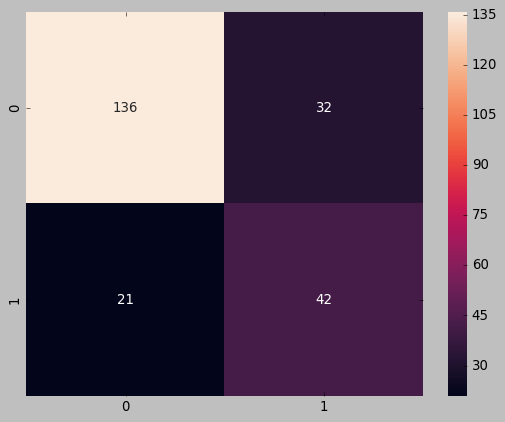

In [52]:
sns.heatmap(cm,fmt='d',annot=True)

# KNN CLASSIFIER

In [53]:
#using the K nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print('classification report',classification_report(kn_pred,y_test))
cm=confusion_matrix(kn_pred,y_test)
print('ROC:',roc_auc_score(kn_pred,y_test)*100)
kn.get_params()

classification report               precision    recall  f1-score   support

           0       0.85      0.79      0.82       169
           1       0.53      0.63      0.57        62

    accuracy                           0.75       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.77      0.75      0.76       231

ROC: 71.09658331742699


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [54]:
#evaluation the model
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print('classification report',classification_report(kn_pred,y_test))
cm=confusion_matrix(kn_pred,y_test)
print('ROC:',roc_auc_score(kn_pred,y_test)*100)

classification report               precision    recall  f1-score   support

           0       0.85      0.79      0.82       169
           1       0.53      0.63      0.57        62

    accuracy                           0.75       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.77      0.75      0.76       231

ROC: 71.09658331742699


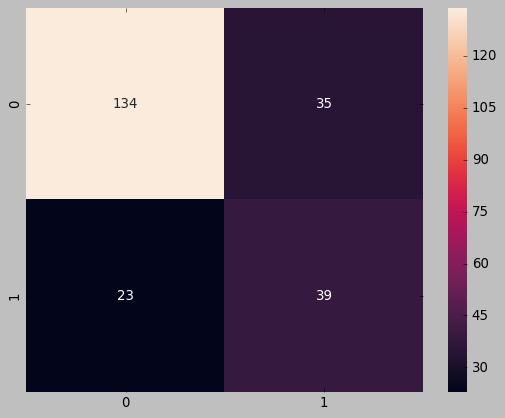

In [55]:
sns.heatmap(cm,annot=True,fmt='d')

# LOGISTIC REGRESSION

In [56]:
#using the logistic regression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,C=2.0)
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
#accuracy of the logistic regression model 
print('classification report:{}'.format(classification_report(lr_pred,y_test)))
print('ROC:', roc_auc_score(lr_pred,y_test))
cm=confusion_matrix(lr_pred,y_test)
print(lr.get_params())


classification report:              precision    recall  f1-score   support

           0       0.90      0.81      0.85       174
           1       0.55      0.72      0.63        57

    accuracy                           0.79       231
   macro avg       0.73      0.76      0.74       231
weighted avg       0.81      0.79      0.80       231

ROC: 0.764821536600121
{'C': 2.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


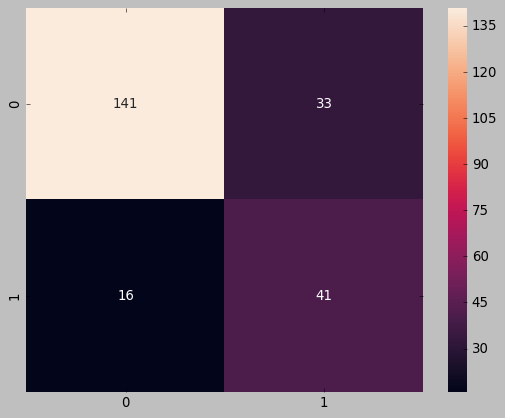

In [29]:
sns.heatmap(cm,annot=True,fmt='d')

# NAIVE BAYES

In [30]:
#using the naive bayes 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)

#Evaluation
print('classification report',classification_report(nb_pred,y_test))
print('ROC:', roc_auc_score(nb_pred,y_test)*100)
nb.get_params()

classification report               precision    recall  f1-score   support

           0       0.88      0.79      0.83       174
           1       0.51      0.67      0.58        57

    accuracy                           0.76       231
   macro avg       0.70      0.73      0.71       231
weighted avg       0.79      0.76      0.77       231

ROC: 72.98850574712642


{'priors': None, 'var_smoothing': 1e-09}

# GRADIENT BOOSTING

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
gbr.fit(X_train,y_train)
gbr_pred=gbr.predict(X_test)
#Evaluation
print('classification report',classification_report(gbr_pred,y_test))
print('ROC:', roc_auc_score(gbr_pred,y_test)*100)
cm=confusion_matrix(gbr_pred,y_test)
gbr.get_params()
print(gbr.get_params())

classification report               precision    recall  f1-score   support

           0       0.87      0.83      0.85       164
           1       0.62      0.69      0.65        67

    accuracy                           0.79       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.80      0.79      0.79       231

ROC: 75.79177284310155
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


# SVM

In [61]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
sv_pred=sv.predict(X_test)

print('classification report',classification_report(sv_pred,y_test))
print('ROC:', roc_auc_score(sv_pred,y_test)*100)
cm=confusion_matrix(sv_pred,y_test)
sv.get_params()
print(sv.get_params())

classification report               precision    recall  f1-score   support

           0       0.90      0.77      0.83       184
           1       0.43      0.68      0.53        47

    accuracy                           0.75       231
   macro avg       0.67      0.73      0.68       231
weighted avg       0.81      0.75      0.77       231

ROC: 72.62950971322849
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


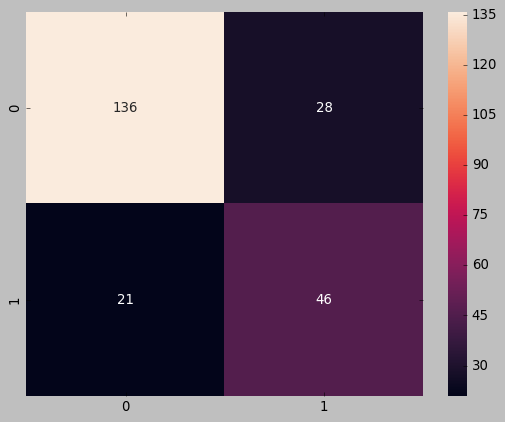

In [32]:
sns.heatmap(cm,annot=True, fmt='d')

In the end we were able to predict diabetes from medical records with an accuracy of approximately 80%. This was done by using Logistic Regression 
logistic regression gave us the highest accuracy (79) and roc score (76). In order to get a higher accuracy, we need to perform hyperparameter tunning with GridSearchCV. this will take quite a long time to execute.
The errorneous values did not have any serious impact on our predictions. it does not have that power in making predictins on this problem


In [33]:
import pickle
#saving and storing the data for deployment with streamlit
#open a file want to store the data
file=open('LogisticRegression.pkl','wb')
##dump that file 
pickle.dump(gbr,file)
model=pickle.load(open('LogisticRegression.pkl','rb'))

In [34]:
X_test.iloc[0]

Pregnancies                   1.000
Glucose                     199.000
BloodPressure                76.000
SkinThickness                43.000
Insulin                       0.000
BMI                          42.900
DiabetesPedigreeFunction      1.394
Age                          22.000
Name: 661, dtype: float64